<a href="https://colab.research.google.com/github/ab2gbl/Master2/blob/main/AAI/TP/AAI_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# sugmentation

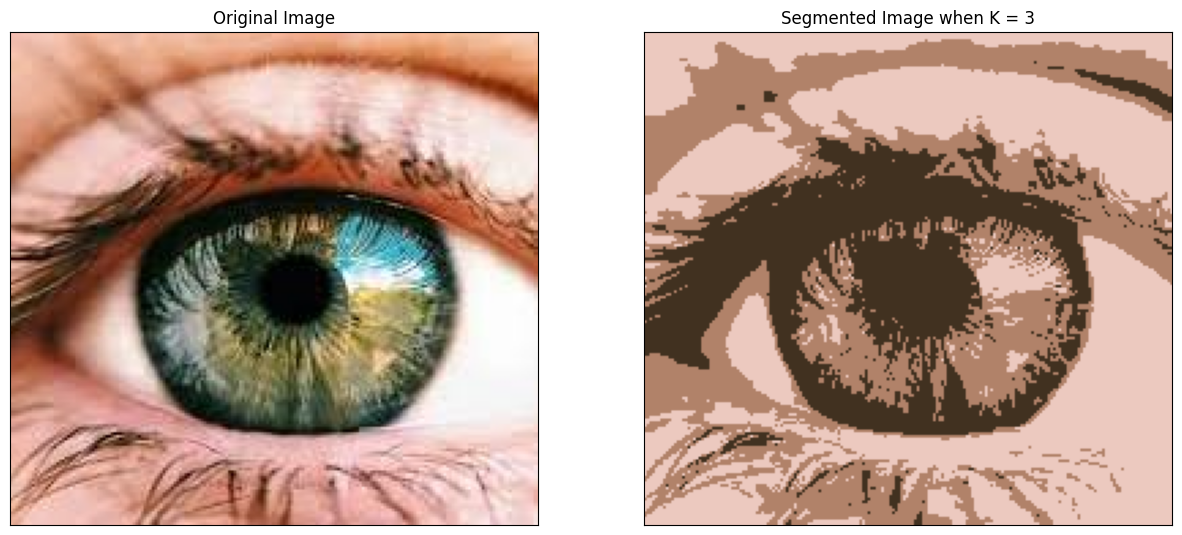

In [ ]:
original_image = cv2.imread("/pic.jpeg")
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)  #convert pic to HSV from rgb
vectorized = img.reshape((-1,3))    # convert the pic from m*n*3 to k * 3
vectorized = np.float32(vectorized) # convert the values to float
#
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
#
K = 5
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
#
center = np.uint8(center)
#
res = center[label.flatten()]
result_image = res.reshape((img.shape))
#
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

# binairation

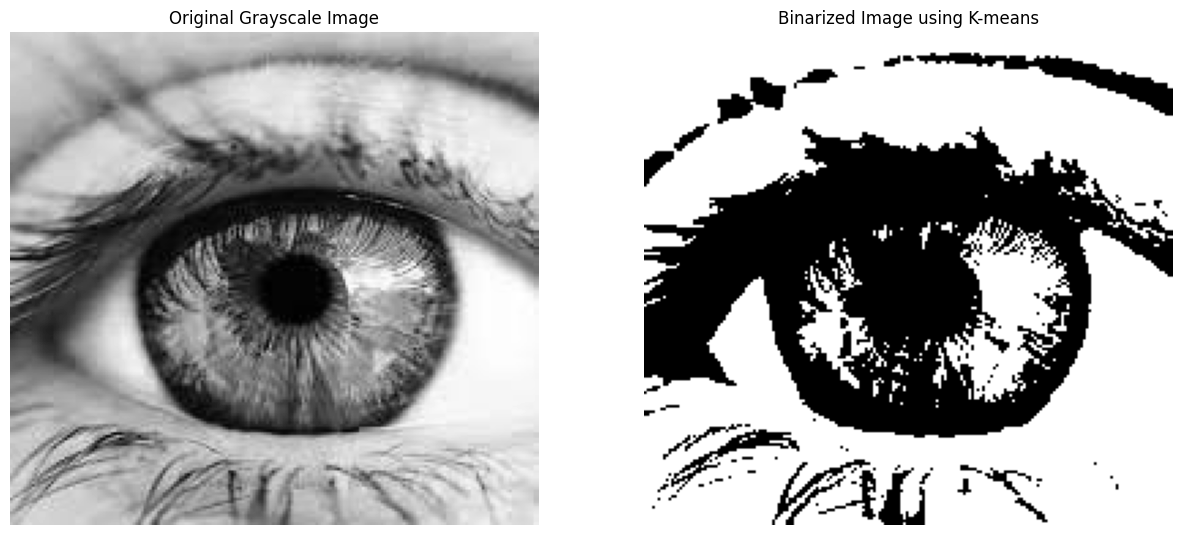

In [ ]:
# Convert the image to grayscale for binarization
gray_img = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Reshape the grayscale image to a 2D array of pixels
vectorized = gray_img.reshape((-1, 1))
vectorized = np.float32(vectorized)

# Apply K-means clustering with K = 2 (for binary clustering)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts = 10
_, label, center = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)


# Convert cluster centers to 0 and 255 (binary image)
center = np.uint8(center)
binary_image = center[label.flatten()]
binary_image = binary_image.reshape(gray_img.shape)

# Display the original grayscale image and the binarized image
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Binarized Image using K-means')
plt.axis('off')

plt.show()


# 3


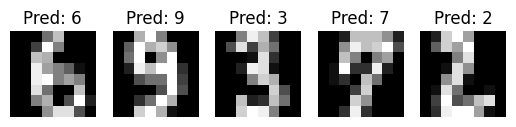

Model Accuracy: 98.33%


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Step 1: Load the digits dataset
digits = datasets.load_digits()

# Step 2: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Step 3: Train a k-Nearest Neighbors (k-NN) classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors if needed
knn.fit(X_train, y_train)

# Step 4: Test the classifier on the test set
predictions = knn.predict(X_test)

# Step 5: Display the first 5 test images and their predicted labels
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')  # Reshape the flat 64-pixel array back into an 8x8 image
    plt.title(f'Pred: {predictions[i]}')
    plt.axis('off')

plt.show()

# Step 6: Calculate and print the accuracy of the model
accuracy = knn.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")





resource: https://www.kdnuggets.com/2019/08/introduction-image-segmentation-k-means-clustering.html